In [1]:
import requests
from bs4 import BeautifulSoup
from kafka import KafkaProducer
import json
import time
import matplotlib.pyplot as plt

url = "https://scrapeme.live/shop/"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')


In [2]:
producer = KafkaProducer(
    bootstrap_servers='localhost:9092',
    value_serializer=lambda v: json.dumps(v).encode('utf-8')
)

topic = 'product_data'

num_products = 100
products = []

for product in products:
    producer.send(topic, product)
    time.sleep(1)  # Her veriyi 1 saniye aralıklarla gönder
producer.flush()

print("Data sent to Kafka.")

Data sent to Kafka.


In [3]:
from kafka import KafkaConsumer
import json

consumer = KafkaConsumer(
    'product_data',
    bootstrap_servers='localhost:9092',
    auto_offset_reset='earliest',
    value_deserializer=lambda x: json.loads(x.decode('utf-8'))
)

num_messages = 100
messages = []

with open('products.json', 'w', encoding='utf-8') as f:
    for i, message in enumerate(consumer):
        if i >= num_messages:
            break

        data = message.value
        
        if 'price' in data:
            data['price'] = data['price'].encode('latin1').decode('unicode_escape')
            
        messages.append(data)

        json.dump(data, f, ensure_ascii=False)
        f.write('\n')

print("Fetched and written messages:", messages)

consumer.close()
print("Consumer operation completed.")


Fetched and written messages: [{'name': 'Bulbasaur', 'price': '£63.00'}, {'name': 'Ivysaur', 'price': '£87.00'}, {'name': 'Venusaur', 'price': '£105.00'}, {'name': 'Charmander', 'price': '£48.00'}, {'name': 'Charmeleon', 'price': '£165.00'}, {'name': 'Charizard', 'price': '£156.00'}, {'name': 'Squirtle', 'price': '£130.00'}, {'name': 'Wartortle', 'price': '£123.00'}, {'name': 'Blastoise', 'price': '£76.00'}, {'name': 'Caterpie', 'price': '£73.00'}, {'name': 'Metapod', 'price': '£148.00'}, {'name': 'Butterfree', 'price': '£162.00'}, {'name': 'Weedle', 'price': '£25.00'}, {'name': 'Kakuna', 'price': '£148.00'}, {'name': 'Beedrill', 'price': '£168.00'}, {'name': 'Pidgey', 'price': '£159.00'}, {'name': 'Bulbasaur', 'price': '£63.00'}, {'name': 'Ivysaur', 'price': '£87.00'}, {'name': 'Venusaur', 'price': '£105.00'}, {'name': 'Charmander', 'price': '£48.00'}, {'name': 'Charmeleon', 'price': '£165.00'}, {'name': 'Charizard', 'price': '£156.00'}, {'name': 'Squirtle', 'price': '£130.00'}, {'nam

Fetched products: [{'name': 'Bulbasaur', 'price': 63.0}, {'name': 'Ivysaur', 'price': 87.0}, {'name': 'Venusaur', 'price': 105.0}, {'name': 'Charmander', 'price': 48.0}, {'name': 'Charmeleon', 'price': 165.0}, {'name': 'Charizard', 'price': 156.0}, {'name': 'Squirtle', 'price': 130.0}, {'name': 'Wartortle', 'price': 123.0}, {'name': 'Blastoise', 'price': 76.0}, {'name': 'Caterpie', 'price': 73.0}, {'name': 'Metapod', 'price': 148.0}, {'name': 'Butterfree', 'price': 162.0}, {'name': 'Weedle', 'price': 25.0}, {'name': 'Kakuna', 'price': 148.0}, {'name': 'Beedrill', 'price': 168.0}, {'name': 'Pidgey', 'price': 159.0}]


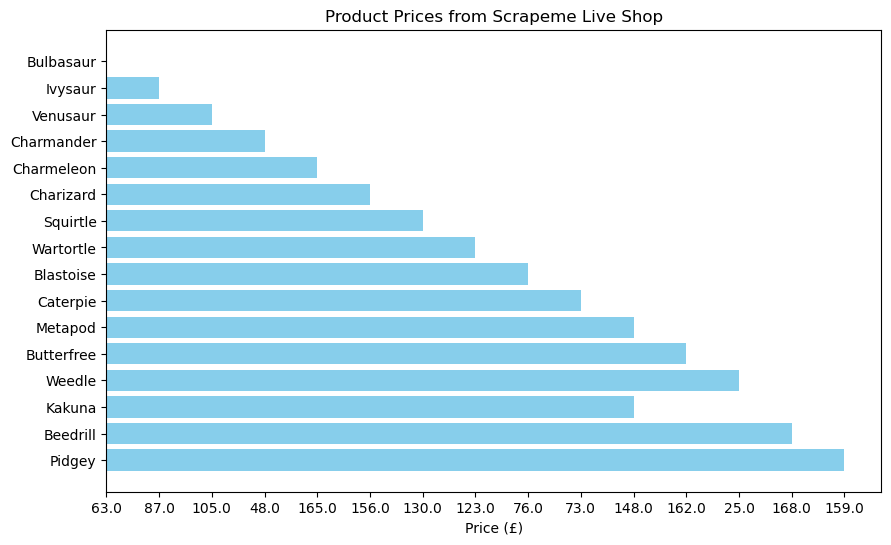

In [4]:
for i, product in enumerate(soup.select('.product')):
    if i >= num_products:
        break
    name = product.select_one('.woocommerce-loop-product__title').text.strip()
    price = product.select_one('.price').text.strip()


    price = float(price.replace('£', '').replace(',', ''))
    products.append({'name': name, 'price': price})

print("Fetched products:", products)


product_names = [product['name'] for product in products]
product_prices = [str(product['price']) for product in products]

plt.figure(figsize=(10, 6))
plt.barh(product_names, product_prices, color='skyblue')
plt.xlabel('Price (£)')
plt.title('Product Prices from Scrapeme Live Shop')
plt.gca().invert_yaxis()
plt.show()

In [5]:
!pip install Flask

In [7]:
import os

file_size = os.path.getsize('C:\\Users\\Melissa\\MelissaGurpinar-Tasks\\products.json')
print(f"Size of JSON file: {file_size} bytes")

Size of JSON file: 4275 bytes


In [ ]:
from flask import Flask, jsonify
import json
from werkzeug.serving import run_simple

app = Flask(__name__)

@app.route('/')
def home():
    return "Welcome to the Products API! Use the /products endpoint to get the product list."

@app.route('/products', methods=['GET'])
def get_products():
    file_path = 'C:\\Users\\Melissa\\AAA\\products.json'
    if os.path.exists(file_path):
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
        return jsonify(data)
    else:
        return jsonify({"error": "File not found"}), 404

if __name__ == '__main__':
    run_simple('localhost', 5000, app)


 * Running on http://localhost:5000/ (Press CTRL+C to quit)
